<a href="https://colab.research.google.com/github/adalves-ufabc/2024.Q2-PLN/blob/main/2024_Q2_PLN_AULA_14_Notebook_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Processamento de Linguagem Natural [2024-Q2]**
Prof. Alexandre Donizeti Alves

## **Reconhecimento de Entidades Nomeadas**
---



**Reconhecimento de Entidades Nomeadas** (*Named Entity Recognition*, ou *NER*) é é uma técnica de **Extração de Informação** que identifica e classifica automaticamente entidades específicas dentro de um texto. Essas entidades podem ser nomes de pessoas, organizações, localizações geográficas, datas, valores monetários, entre outros.

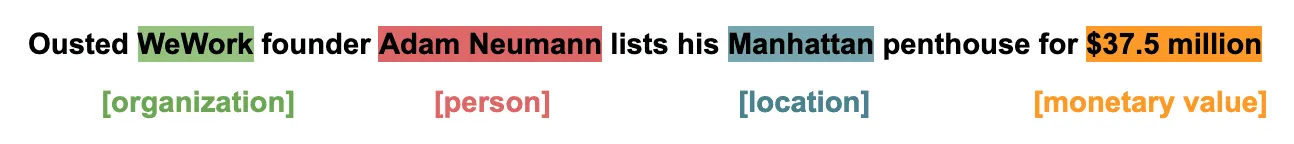

Antes dos grandes modelos de linguagem, o **Reconhecimento de Entidades Nomeadas** era realizado principalmente através de abordagens baseadas em regras, aprendizado de máquina tradicional e técnicas estatísticas.

Por exemplo, em **abordagens baseadas em regras**, padrões predefinidos, como **expressões regulares**, eram utilizados para identificar entidades específicas em um texto, como datas e endereços. Além disso, havia métodos que empregavam **dicionários e listas de palavras**, em que repositórios de nomes conhecidos, como listas de cidades ou nomes próprios, eram utilizados para corresponder diretamente termos no texto.

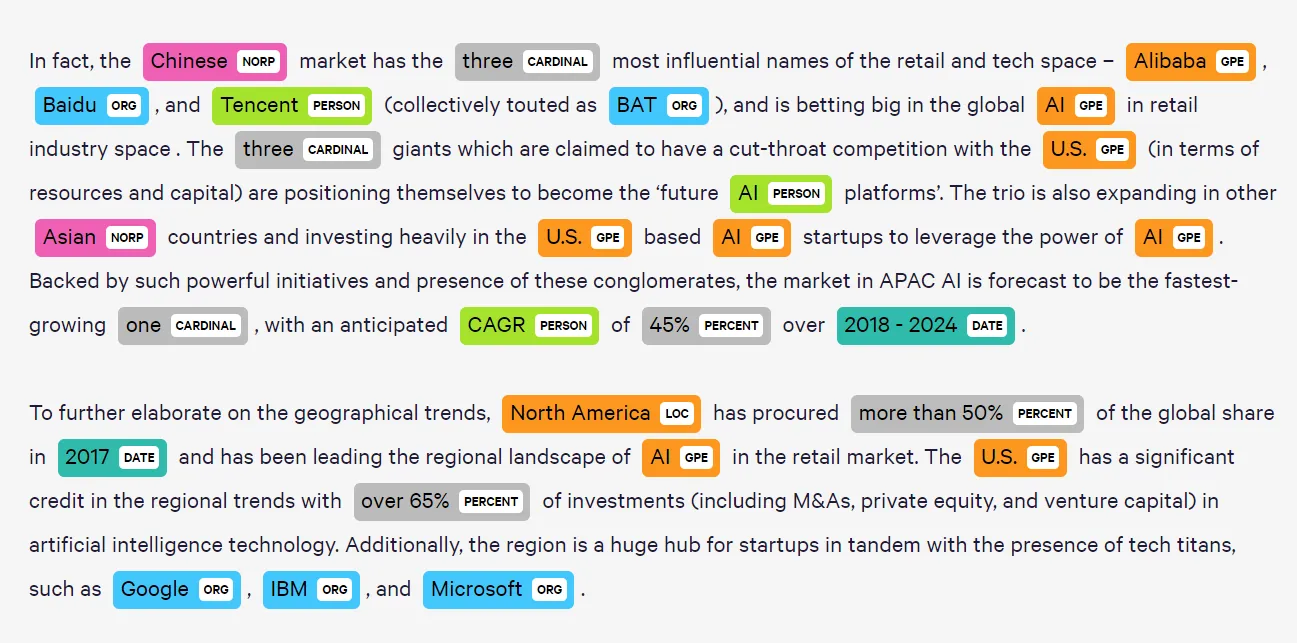

#### **LangChain**

In [ ]:
#@title Instalando o pacote LangChain
!pip install -qU langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.8/997.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.8/384.8 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.4/140.4 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 4.9 MB/s eta 0:00:00


In [ ]:
#@title Versão do LangChain

import langchain

print(langchain.__version__)

0.2.13


In [ ]:
#@title Integração com o pacote da OpenAI

!pip install -qU langchain-openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 361.3/361.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.0 MB/s eta 0:00:00


In [ ]:
#@title Definindo a chave da API da OpenAI

import getpass
import os

os.environ["OPENAI_API_KEY"] = getpass.getpass()

··········


#### **Exemplos**

In [ ]:
texto = """"A influente empresária Maria Silva está honrando seu compromisso e apoiando os pequenos empreendedores de Belo Horizonte, Minas Gerais,
e comunidades em todo o Brasil a conquistar o crescimento econômico que tanto almejam. """

In [ ]:
from openai import OpenAI

cliente = OpenAI()

In [ ]:
resposta = cliente.chat.completions.create(
      model="gpt-4o-mini",
      response_format={ "type": "json_object" },
      messages=[
        {"role": "system", "content": '"Você é um assistente prestativo que extrai nomes e localizações do texto. Use o formato JSON na saída.'},
        {"role": "user", "content": texto}
      ]
    )


In [ ]:
resposta

ChatCompletion(id='chatcmpl-9vjhhZ3371MZ5ShuQRtqmHXEzPjtR', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='{\n  "nomes": ["Maria Silva"],\n  "localizações": ["Belo Horizonte", "Minas Gerais", "Brasil"]\n}', refusal=None, role='assistant', function_call=None, tool_calls=None))], created=1723547409, model='gpt-4o-mini-2024-07-18', object='chat.completion', service_tier=None, system_fingerprint='fp_507c9469a1', usage=CompletionUsage(completion_tokens=29, prompt_tokens=81, total_tokens=110))

In [ ]:
print(resposta.choices[0].message.content)

{
  "nomes": ["Maria Silva"],
  "localizações": ["Belo Horizonte", "Minas Gerais", "Brasil"]
}


Agora um exemplo usando **LangChain**:

In [ ]:
from langchain_openai import ChatOpenAI

modelo = ChatOpenAI(model='gpt-4o-mini', temperature=0)

In [ ]:
from typing import List
from pydantic import BaseModel, Field

class NER(BaseModel):
    """Queremos extrair as entidades 'nome', 'idade', 'data', 'endereço', 'telefone' e 'conta bancária'"""
    ner: List[str] = Field(description="a entidade detectada no documento, como nome, idade, data, endereço, telefone, nome da empresa e conta bancária")
    type: List[str] = Field(description="o tipo da entidade detectada, com possíveis valores: 'nome', 'idade', 'data', 'endereco', 'telefone', 'empresa' e 'conta_bancaria'. Para cada entidade detectada em ner, este deve ser o tipo correspondente")


In [ ]:
from langchain_core.utils.function_calling import convert_to_openai_function

funcoes_extracao = [convert_to_openai_function(NER)]
modelo_extracao = cliente.bind( functions = funcoes_extracao, function_call={"name": "NER"} )

In [ ]:
from langchain.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_messages([
    ("system", "Extraia as informações relevantes; se não estiverem explicitamente fornecidas, não faça suposições. Extraia informações parciais."),
    ("human", "{input}")
])

In [ ]:
from langchain.output_parsers.openai_functions import JsonOutputFunctionsParser

chain_extracao = prompt | modelo_extracao | JsonOutputFunctionsParser()

In [ ]:
texto = """Meu nome é João Silva e sou casado com Maria Oliveira e temos uma filha chamada Ana. Eu nasci em 1988 e tenho 35 anos.
Trabalho na InovaTech e meu e-mail é joao.silva@inovatech.com.
Moro em São Paulo, Brasil. Meu número de telefone é 11 91234-5678 e minha conta bancária é 123-456-789-00"""

chain_extracao.invoke({"input": texto})

{'ner': ['João Silva',
  'Maria Oliveira',
  'Ana',
  '1988',
  '35 anos',
  'InovaTech',
  'joao.silva@inovatech.com',
  'São Paulo, Brasil',
  '11 91234-5678',
  '123-456-789-00'],
 'type': ['nome',
  'nome',
  'nome',
  'data',
  'idade',
  'empresa',
  'email',
  'endereco',
  'telefone',
  'conta_bancaria']}

Mais um exemplo:

In [ ]:
class NER(BaseModel):
    ner: List[str] = Field(description="Entidades detectadas no texto, como produtos, locais, datas, marcas e nomes")
    type: List[str] = Field(description="Tipo da entidade detectada com possíveis valores: 'produto', 'local', 'data', 'marca', 'nome'.")

prompt_template = """
Extraia e classifique as seguintes entidades nomeadas do texto fornecido.
Para cada entidade, forneça o nome e o tipo da entidade (por exemplo, 'produto', 'local', 'data', 'marca', 'nome').

Texto:
{input_text}

Entidades e Tipos:
"""

prompt = ChatPromptTemplate.from_template(prompt_template)

chain = prompt | cliente.bind(functions=[convert_to_openai_function(NER)], function_call={"name": "NER"}) | JsonOutputFunctionsParser()

In [ ]:
texto = """A nova linha de smartphones da marca Galaxy, chamada Galaxy Z Fold 5, foi lançada no mercado em agosto de 2024.
O lançamento aconteceu em Nova York, EUA, e o evento foi um grande sucesso.
A Galaxy também anunciou uma parceria com a empresa de software CloudTech, cujo CEO, James Brown, participou do evento.
As pré-vendas começaram no dia 10 de agosto e o produto estará disponível nas lojas a partir do dia 25 de agosto."""

chain.invoke({"input_text": texto})

{'ner': ['Galaxy',
  'Galaxy Z Fold 5',
  'agosto de 2024',
  'Nova York',
  'EUA',
  'Galaxy',
  'CloudTech',
  'James Brown',
  '10 de agosto',
  '25 de agosto'],
 'type': ['marca',
  'produto',
  'data',
  'local',
  'local',
  'marca',
  'marca',
  'nome',
  'data',
  'data']}

## **Referências**

> https://github.com/ecdedios/ai-nlp-named-entity-recognition

> https://predictivehacks.com/ner-with-openai-and-langchain/


>